In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB 
from LogisticRegressor import LogisticRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns
% matplotlib inline

In [2]:
filename = 'winequality-red.csv'  #Download the file from https://archive.ics.uci.edu/ml/datasets/wine+quality
df = pd.read_csv(filename, sep=';')
#categorize wine quality in three levels
bins = (0,3.5,5.5,10)
categories = pd.cut(df['quality'], bins, labels = ['bad','ok','good'])
df['quality'] = categories
# Preprocessing and splitting data to X and y
X = df.drop(['quality'], axis = 1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
y = df['quality']
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 323)



In [3]:
y_train

array([2, 2, 1, ..., 2, 2, 1])

In [4]:
df['quality'].value_counts()

good    855
ok      734
bad      10
Name: quality, dtype: int64

In [5]:
clf1 = SVC(random_state=22)
clf2 = DecisionTreeClassifier(random_state=23)
clf3 = GaussianNB()
X = np.array(X_train)
y = np.array(y_train)
eclf = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf = eclf.fit(X, y)
y_pred = eclf.predict(X_test)

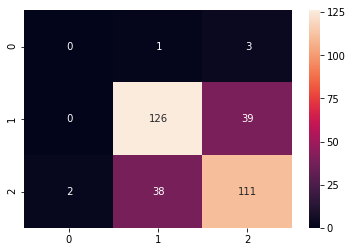

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [7]:
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.740625
